In [3]:
import pandas as pd
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data = churn_data.drop('RowNumber',1)
display(churn_data.head())

C:\Users\sfedo\AppData\Local\Temp/ipykernel_16368/1675065552.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  churn_data = churn_data.drop('RowNumber',1)


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


Около 20% клиентов ушли из компании за данный промежуток времени.


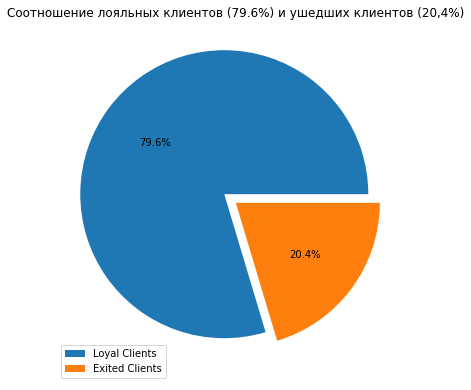

In [6]:
Q1 = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
_, _, _ = axes.pie(
    Q1,
    #labels=['Loyal Clients','Exited Clients'],
    autopct='%.1f%%',
    
    explode = [0.1, 0]
)
axes.set_title("Соотношение лояльных клиентов (79.6%) и ушедших клиентов (20,4%)") 
axes.legend(['Loyal Clients','Exited Clients']) 
print('Около 20% клиентов ушли из компании за данный промежуток времени.')

# 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

График показывает относительно "нормальное" распределение баланса на счетах клиентов. Большинство клиентов именют на счету в диапазоне от $102,000 до $130,000


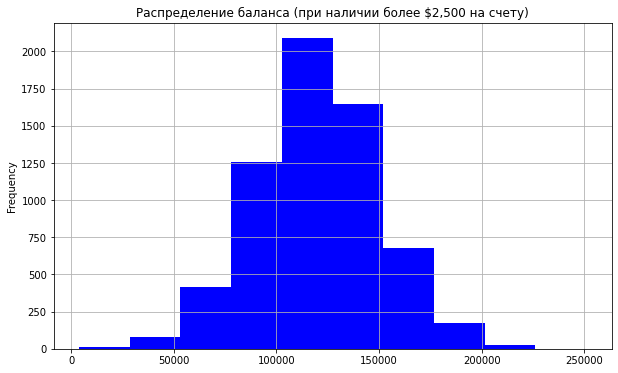

In [7]:
mask1 = churn_data['Balance'] > 2500
Q2 = churn_data[mask1]['Balance']
Q2.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение баланса (при наличии более $2,500 на счету)',
    grid = True,
    color = 'blue',
    bins=10
)
print('График показывает относительно "нормальное" распределение баланса на счетах клиентов. Большинство клиентов именют на счету в диапазоне от $102,000 до $130,000')

# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Распределение для лояльных клиентов (0), схоже с распределением ушедших клиентов (1). Это показывает, что сумма на балансе не является ключевым фактором для разделения клиентов на лояльных и ушедших


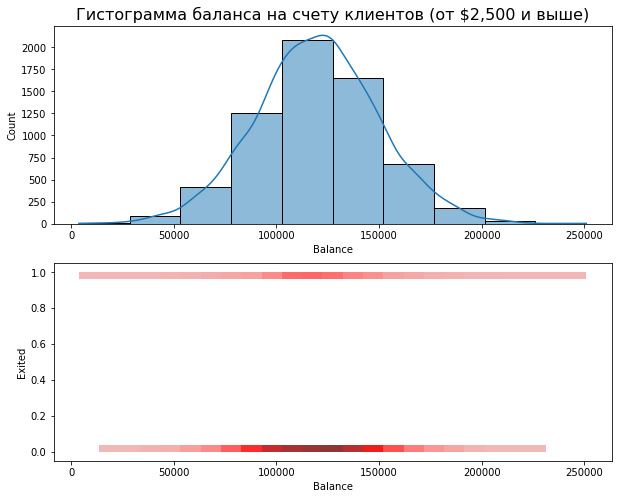

In [8]:
import seaborn as sns
mask1 = churn_data['Balance'] > 2500
Q3 = churn_data[mask1]
Label = ['Loyal','Exited']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data=Q3,
    x='Balance',
    bins=10,
    kde=True,
    ax=axes[0]
)
axes[0].set_title('Гистограмма баланса на счету клиентов (от $2,500 и выше)', fontsize=16)
sns.histplot(
    data=Q3,
    x='Balance',
    y='Exited',
    bins=25,
    color='red',
    ax=axes[1]
)
print('Распределение для лояльных клиентов (0), схоже с распределением ушедших клиентов (1). Это показывает, что сумма на балансе не является ключевым фактором для разделения клиентов на лояльных и ушедших')


# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Зависимость оттока клиентов от возраста имеет "стандартное" распределение и не имее явных возрастных аномалий. Большинство ушедших клиентов имели возраст от 35 до 52 лет 


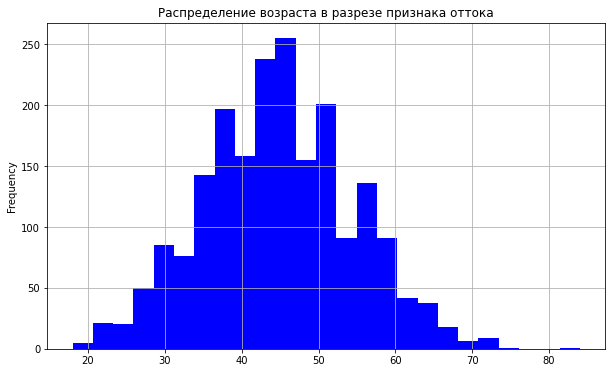

In [9]:
mask2 = churn_data['Exited'] == 1
Q4 = churn_data[mask2]['Age']



Q4.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение возраста в разрезе признака оттока',
    grid = True,
    color = 'blue',
    bins=25
)
print('Зависимость оттока клиентов от возраста имеет "стандартное" распределение и не имее явных возрастных аномалий. Большинство ушедших клиентов имели возраст от 35 до 52 лет ')

# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

Нет явной зависимости между Кредитным Рейтингом и Заработной платой. Распределения для "Лояльных" и "Ушедших" клиентов схожее


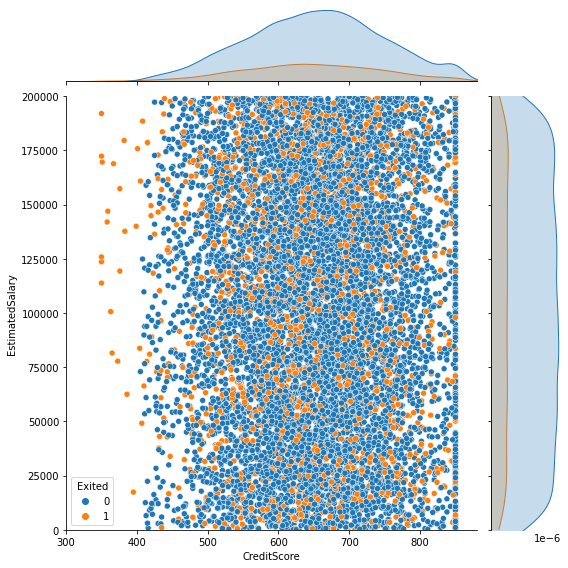

In [10]:
Q5 = churn_data

jointplot = sns.jointplot(
    data=Q5, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim = (300, 880),
    ylim = (0, 200000),
    height=8,
)

print('Нет явной зависимости между Кредитным Рейтингом и Заработной платой. Распределения для "Лояльных" и "Ушедших" клиентов схожее')

# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [13]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [15]:


mask_male = churn_data['Gender'] == 'Male'
mask_female = churn_data['Gender'] == 'Female'
mask_exited = churn_data['Exited'] == 1

aver_male = churn_data[mask_male]['Exited'].mean()*100
aver_female = churn_data[mask_female]['Exited'].mean()*100



Q6 = ([aver_male, aver_female])

#Q6 = churn_data.groupby(['Gender'])['Exited']

Q6.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
)




AttributeError: 'list' object has no attribute 'plot'